A more complex example
======================

Here, we are going to learn how to use *pyKasso* with a little more complex example than the [pyKasso_simple_example.ipynb](pyKasso_simple_example.ipynb).

This example is intended to show more specifics functionalities and to understand how python loops can be used to perform several simulations.

Here, we are going to use the datafiles from the Betteraz's catchment.

Create a new project
--------------------

First, we need to import the pyKasso module:

In [1]:
import pykasso as pk

Betteraz's datafiles are already integrated in the *pyKasso* module. <br>
With the ``get_settings()`` function, the module create a copy of the default settings file on the directory where the script is executed. <br>
If the ``example`` argument is ``True``, the function will provide us all the settings file from the Betteraz's catchment.  

In [2]:
pk.get_settings(example=True)

The function created a directory named ``inputs``. Inside, we can find all the settings files required to reproduce the Betteraz's catchment. <br>

We can now create an instance of the ``SKS`` class and give the relative path of a settings file.

In [3]:
betteraz = pk.SKS('inputs/betteraz_cas_1.yaml')

Visualize the generated environment
-------------------------------------
	
Let's have a look on the geological settings:

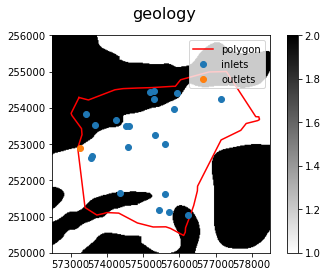

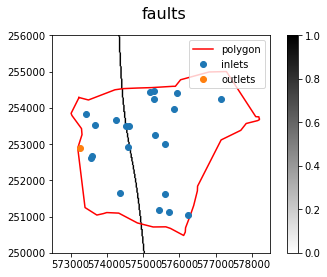

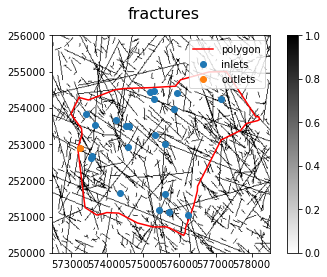

In [4]:
betteraz.show_catchment(data='geology')

betteraz.show_catchment(data='faults')

betteraz.show_catchment(data='fractures')

We can also visualize the data cut with the polygon delimitations:

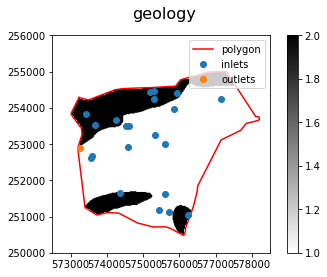

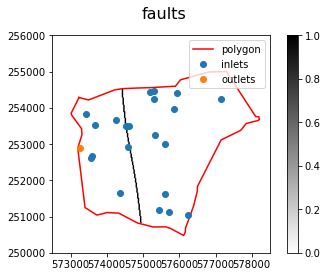

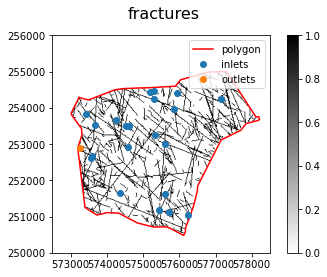

In [5]:
betteraz.show_catchment(data='geology', mask=True)

betteraz.show_catchment(data='faults', mask=True)

betteraz.show_catchment(data='fractures', mask=True)

Compute karst network and tweak parameters
------------------------------------------

We can simulate different karst network by changing some parameters. There is a ``get`` and a ``set`` method for almost each parameter.

In [6]:
betteraz.compute_karst_network()


 This network contains  4  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Now, we can write a loop and change some parameters. For example, let's see the influence of the alpha parameter on the generated karstic networks:


 This network contains  4  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


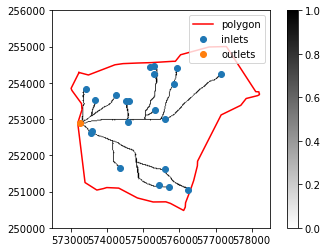


 This network contains  4  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


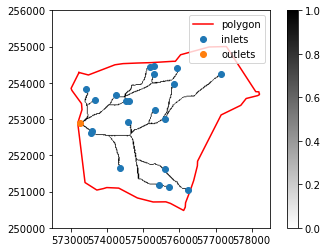


 This network contains  4  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


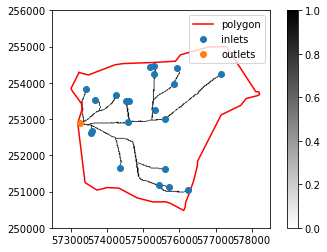


 This network contains  4  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


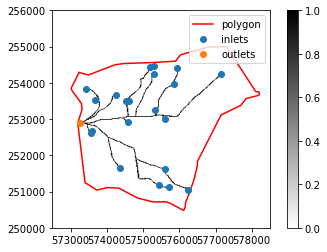


 This network contains  4  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


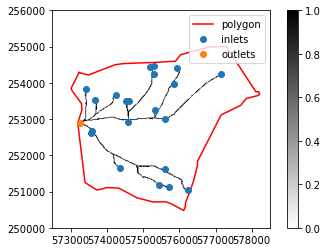

In [9]:
alphas = [1.7,1.9,2.1,2.3,2.5]        #what does the alpha parameter DO?

for alpha in alphas:
    betteraz.set_alpha(alpha)
    betteraz.update_fractures() # will produce new fractures
    #betteraz.show_catchment(data='fractures', mask=1) #uncomment to display fracture on map
    betteraz.compute_karst_network()
    betteraz.show()

All the simulations are stored in this list:

In [10]:
betteraz.karst_simulations

Visualize the simulations
-------------------------

In our small loop, only the fracturation changed. It could be interesting to produce a probability map for karst conduit presence based on the simulated ones. <br>
In order to produce such a map, we can simply attribute ``True`` to the ``probability`` argument from the ``show()`` method:

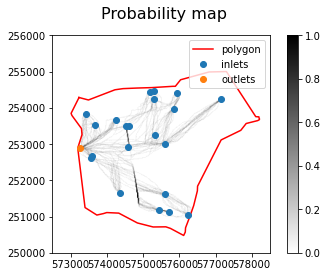

In [11]:
betteraz.show(title='Probability map', probability=True)

Compare the statistics
----------------------

We can also compare the metrics with the mean of the simulations results:

In [12]:
betteraz.compare_stats(mean=True)



MEAN STATS
Var       Value       Min ref     Max ref     Result      
------------------------------------------------------
CPD       0.126       0.022       0.572       IN          
CVk       0.544       0.351       0.592       IN          
CVl       1.005       0.898       2.555       IN          
H0        0.964       0.491       0.997       IN          
Hl        0.747       0.086       0.694       out +       
SPL       3.429       2.321       55.722      IN          
kmoy      1.8         1.75        2.569       IN          
rk        -0.375      -0.556      -0.15       IN          
